In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import keras
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



2025-04-28 15:28:37.568790: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-28 15:28:37.573021: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-28 15:28:37.614750: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-28 15:28:37.647540: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745846917.673149  439502 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745846917.68

In [2]:
df = pd.read_csv('data/Melun.csv' , sep=';', header=0)

In [3]:

# Création des données simples
data = {
    'capteur_1': df['TEMPERATURE_CONSIGNE [R]'].astype(str).str.replace(',', '.').astype(float),
    'capteur_2': df['TEMPERATURE_REPRISE [R]'].astype(str).str.replace(',', '.').astype(float),
    'capteur_3': df['POIDS_EAU_CELLULE [R]'].astype(str).str.replace(',', '.').astype(float),
     'capteur_4': df['POIDS_EAU_CONSIGNE [R]'].astype(str).str.replace(',', '.').astype(float),
     'capteur_5': df['HYGROMETRIE_CONSIGNE [I];'].astype(str).str.replace(',', '.').astype(float),
     'capteur_6': df['HYGROMETRIE_CELLULE [I]'].astype(str).str.replace(',', '.').astype(float)

}
df = pd.DataFrame(data)
print(df.head())

kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(df)
print(df)


KeyError: 'HYGROMETRIE_CONSIGNE [I];'

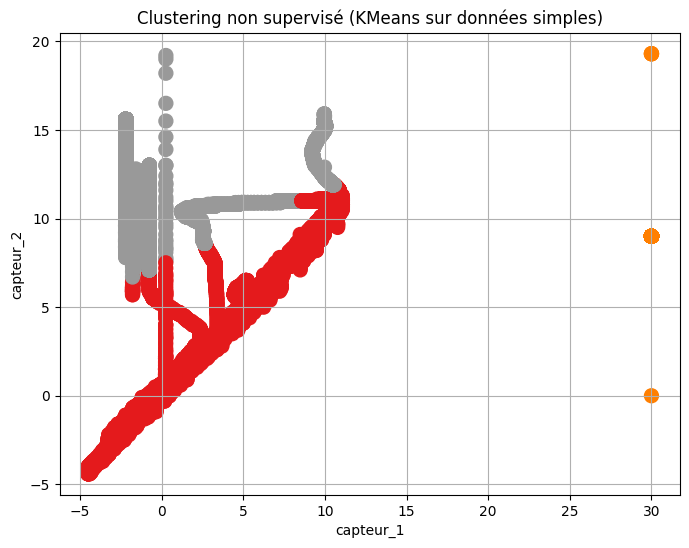

In [263]:
plt.figure(figsize=(8, 6))
plt.scatter(df['capteur_1'], df['capteur_2'], c=df['Cluster'], cmap='Set1', s=100)
plt.title("Clustering non supervisé (KMeans sur données simples)")
plt.xlabel("capteur_1")
plt.ylabel("capteur_2")
plt.grid(True)
plt.show()



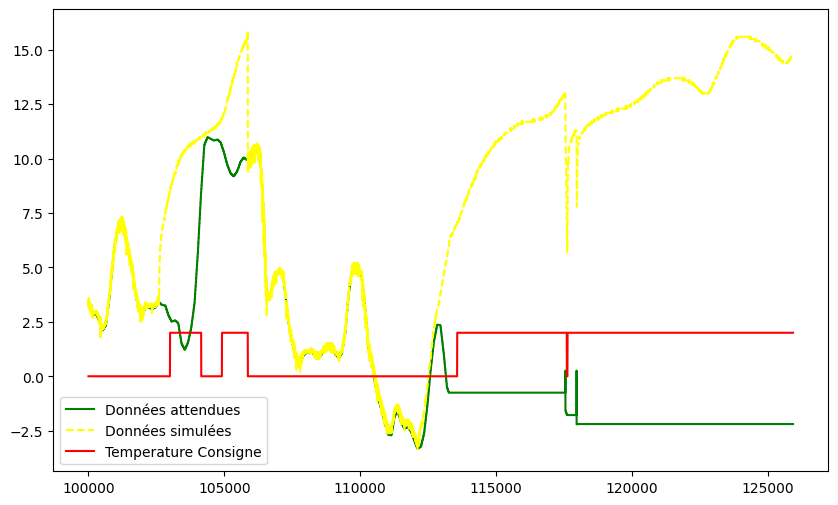

In [264]:
dp= df.iloc[100_000:210_000]

plt.figure(figsize=(10, 6))
plt.plot( dp['capteur_1'], label="Données attendues", color="green")
plt.plot( dp['capteur_2'], label="Données simulées ", color="yellow", linestyle="dashed")
#plt.plot( df['capteur_3'], label="Données simulées ", color="pink", linestyle="dashed")
#plt.plot( df['capteur_4'], label="Données simulées ", color="blue", linestyle="dashed")
plt.plot(dp['Cluster'], color="red" , label="Temperature Consigne")
plt.legend()

plt.show()